# Projet ModIA: IA Frameworks

## Partie 0: Librairies, Données et Exploration

### 0.0 Librairies et Données

Librairies utilisées :

In [1]:
# data
import pandas as pd
import numpy as np

# plot
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# machine learning
import sklearn

# display
from IPython.display import display, HTML

Ouverture des données :

In [7]:
interactions_train = pd.read_csv('../data/interactions_train.csv') # user to train recommender 
interactions_test = pd.read_csv('../data/interactions_test.csv') # used to predict the ratings

raw_interactions = pd.read_csv('../data/RAW_interactions.csv') # sentiment analysis
raw_recipes = pd.read_csv('../data/RAW_recipes.csv') # used for recommender

test_script = pd.read_csv('../data/test_script.csv') 

print(f"There is a total of {interactions_train.shape[0]} interactions and {raw_recipes.shape[0]} recipes")

There is a total of 698901 interactions and 231637 recipes


### 0.1 Exploration

#### a. Quelques statistiques descriptives

In [8]:
# Get all unique user ids from train and test
train_users = interactions_train['user_id'].unique()
test_users = interactions_test['user_id'].unique()

# concatenate users and return unique values
all_users = np.unique(np.concatenate((train_users, test_users), axis=0))

# Get all unique recipe ids from train and test
train_recipes = interactions_train['recipe_id'].unique()
test_recipes = interactions_test['recipe_id'].unique()

# concatenate recipes and return unique values
all_recipes = np.unique(np.concatenate((train_recipes, test_recipes), axis=0))

print('Number of unique users: {}'.format(len(all_users)))
print('Number of unique recipes: {}'.format(len(all_recipes)))

Number of unique users: 25076
Number of unique recipes: 172596


In [21]:
raw_recipes.query(f'id == @top_10_recipe_ids[{i}]')

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
213826,to die for crock pot roast,27208,545,28201,2002-05-03,"['weeknight', 'time-to-make', 'course', 'main-...","[295.2, 14.0, 0.0, 15.0, 99.0, 19.0, 0.0]",7,"['place beef roast in crock pot', 'mix the dri...","amazing flavor, and so simple! no salt needed ...","['beef roast', 'brown gravy mix', 'dried itali...",5


In [22]:
# compute value counts of recipes
recipe_counter = interactions_train['recipe_id'].value_counts()
# most_common_recipe = recipe_counter.idxmax()
# most_common_recipe_count = recipe_counter.max()

# print the 5 most popular recipes and their name
top_10_recipes = recipe_counter[:5]
top_10_recipe_ids = top_10_recipes.index
top_10_recipe_counts = top_10_recipes.values

print('Top 5 recipes:')
for i in range(5):
    print('Recipe id: {}'.format(top_10_recipe_ids[i]))
    print('Number of times it appears: {}'.format(top_10_recipe_counts[i]))
    print('Average rating: {}'.format(
        interactions_train.query(f'recipe_id == @top_10_recipe_ids[{i}]')["rating"].mean()
        )
    )
    print('Recipe name: {}'.format(
        raw_recipes.query(f'id == @top_10_recipe_ids[{i}]')["name"].values[0]
        )
    )
    print()

Top 5 recipes:
Recipe id: 27208
Number of times it appears: 1091
Average rating: 4.413382218148487
Recipe name: to die for crock pot roast

Recipe id: 89204
Number of times it appears: 1075
Average rating: 4.346976744186047
Recipe name: crock pot chicken with black beans   cream cheese

Recipe id: 32204
Number of times it appears: 897
Average rating: 4.608695652173913
Recipe name: whatever floats your boat  brownies

Recipe id: 39087
Number of times it appears: 894
Average rating: 4.691275167785235
Recipe name: creamy cajun chicken pasta

Recipe id: 69173
Number of times it appears: 787
Average rating: 4.777636594663278
Recipe name: kittencal s italian melt in your mouth meatballs



Text(0, 0.5, 'Density')

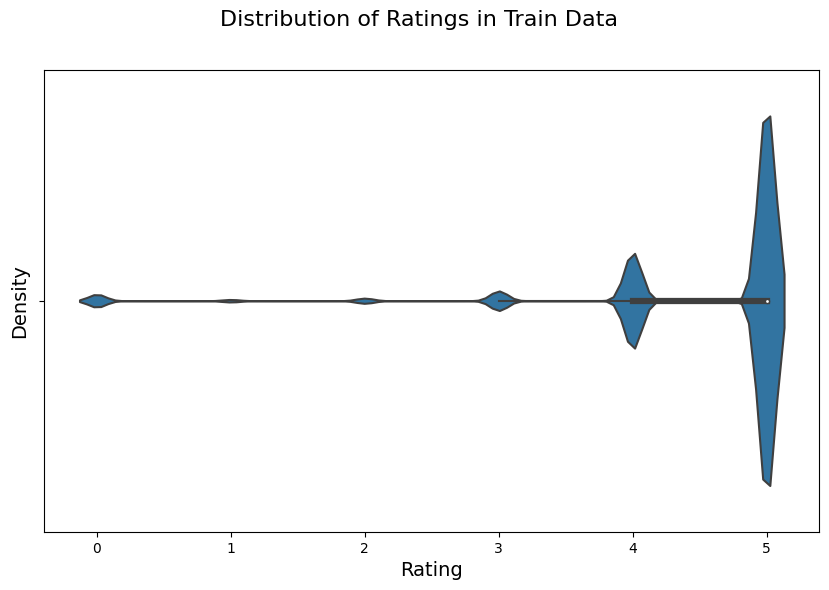

In [23]:
# Violin plot of ratings
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Distribution of Ratings in Train Data', fontsize=16)

sns.violinplot(
    x='rating',
    data=interactions_train,
    ax=ax
)
ax.set_xlabel('Rating', fontsize=14)
ax.set_ylabel('Density', fontsize=14)

## Partie 1 : Système de recommendation simple

### 1.1 Recommendation par popularité

> Based on average rating

In [33]:
# Compute recipe popularity by averaging ratings
recipe_avg = interactions_train.groupby('recipe_id')['rating'].mean()
sorted_recipes_avg = recipe_avg.sort_values(ascending=False)

In [39]:
# Example usage: Recommend the top 5 popular recipes
recommended_recipes = sorted_recipes_avg.head(5).index.tolist()

# print recipe id, name, and average rating
for recommended_recipe in recommended_recipes:
    print('Recipe id: {}'.format(recommended_recipe))
    print('Average rating: {}'.format(
        interactions_train.query(f'recipe_id == {recommended_recipe}')["rating"].mean()
        )
    )
    print('Recipe name: {}'.format(
        raw_recipes.query(f'id == {recommended_recipe}')["name"].values[0]
        )
    )
    print()

Recipe id: 537458
Average rating: 5.0
Recipe name: garlic and herb mashed potatoes

Recipe id: 123184
Average rating: 5.0
Recipe name: morris family s cheese ball

Recipe id: 123217
Average rating: 5.0
Recipe name: lemon linguini with chicken

Recipe id: 123209
Average rating: 5.0
Recipe name: cinnamon biscuits

Recipe id: 283775
Average rating: 5.0
Recipe name: almond roasted duck with chinese spices



> Based on number of ratings

In [40]:
# Compute recipe popularity by number of ratings
recipe_count = interactions_train.groupby('recipe_id')['rating'].count()
sorted_recipes_count = recipe_count.sort_values(ascending=False)

In [41]:
# Example usage: Recommend the top 5 popular recipes
recommended_recipes = sorted_recipes_count.head(5).index.tolist()

# print recipe id, name, and average rating
for recommended_recipe in recommended_recipes:
    print('Recipe id: {}'.format(recommended_recipe))
    print('Average rating: {}'.format(interactions_train[interactions_train['recipe_id'] == recommended_recipe]['rating'].mean()))
    print('Number of ratings: {}'.format(interactions_train[interactions_train['recipe_id'] == recommended_recipe]['rating'].count()))
    print('Recipe name: {}'.format(raw_recipes[raw_recipes['id'] == recommended_recipe]['name'].values[0]))
    print()

Recipe id: 27208
Average rating: 4.413382218148487
Number of ratings: 1091
Recipe name: to die for crock pot roast

Recipe id: 89204
Average rating: 4.346976744186047
Number of ratings: 1075
Recipe name: crock pot chicken with black beans   cream cheese

Recipe id: 32204
Average rating: 4.608695652173913
Number of ratings: 897
Recipe name: whatever floats your boat  brownies

Recipe id: 39087
Average rating: 4.691275167785235
Number of ratings: 894
Recipe name: creamy cajun chicken pasta

Recipe id: 69173
Average rating: 4.777636594663278
Number of ratings: 787
Recipe name: kittencal s italian melt in your mouth meatballs



> Based on weighted average rating

Disadvantages of previous methods: 
- Average rating: recipes with only one five star review have an average of five. However, the review could have been made by a person who has very specific taste and loves the recipe.
- Number of ratings: recipes might appear a lot but not for a good reason. For example, a carbonara recipe with cream might get a lot of negative reviews from Italians.

Therefore, another method that combines average ratings and number of ratings should be implemented. 

For example, we can add the following information:


In [42]:
recipe_weighted_avg = recipe_avg * np.log10(recipe_count + 1)
sorted_recipes_weighted_avg = recipe_weighted_avg.sort_values(ascending=False)

def recommend_popular_recipes_weighted_avg(num_recommendations):
    recommendations = sorted_recipes_weighted_avg.head(num_recommendations)
    return recommendations.index.tolist()

# Example usage: Recommend the top 5 popular recipes
recommended_recipes = recommend_popular_recipes_weighted_avg(5)

# print recipe id, name, and average rating
for i in range(5):
    print('Recipe id: {}'.format(recommended_recipes[i]))
    print('Average rating: {}'.format(interactions_train[interactions_train['recipe_id'] == recommended_recipes[i]]['rating'].mean()))
    print('Number of ratings: {}'.format(interactions_train[interactions_train['recipe_id'] == recommended_recipes[i]]['rating'].count()))
    print('Weighted average: {}'.format(recipe_weighted_avg[recommended_recipes[i]]))
    print('Recipe name: {}'.format(raw_recipes[raw_recipes['id'] == recommended_recipes[i]]['name'].values[0]))
    print()

Recipe id: 39087
Average rating: 4.691275167785235
Number of ratings: 894
Weighted average: 13.847814105273976
Recipe name: creamy cajun chicken pasta

Recipe id: 69173
Average rating: 4.777636594663278
Number of ratings: 787
Weighted average: 13.838549654079705
Recipe name: kittencal s italian melt in your mouth meatballs

Recipe id: 32204
Average rating: 4.608695652173913
Number of ratings: 897
Weighted average: 13.610751812466708
Recipe name: whatever floats your boat  brownies

Recipe id: 27208
Average rating: 4.413382218148487
Number of ratings: 1091
Weighted average: 13.408837766952685
Recipe name: to die for crock pot roast

Recipe id: 28148
Average rating: 4.714714714714715
Number of ratings: 666
Weighted average: 13.31494762537232
Recipe name: oven fried chicken chimichangas



### 1.2 Recommendation par nombre d'étapes de la recette

In [43]:
raw_recipes

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22
231633,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13
231634,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10
